In [1]:
# Author: Marion
# Date: Nov 2021 
# Purpose: Make a graph of the percentages of positive blood vessel spots
rm(list = ls())
library(Rcpp)
library(Seurat)
library(ggplot2)
library(cowplot)
library(dplyr)
library(digest)
library(miniUI)
library(hdf5r)
library(dplyr)
library(grid)
library(gridExtra)
library(stringr)

Attaching SeuratObject

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


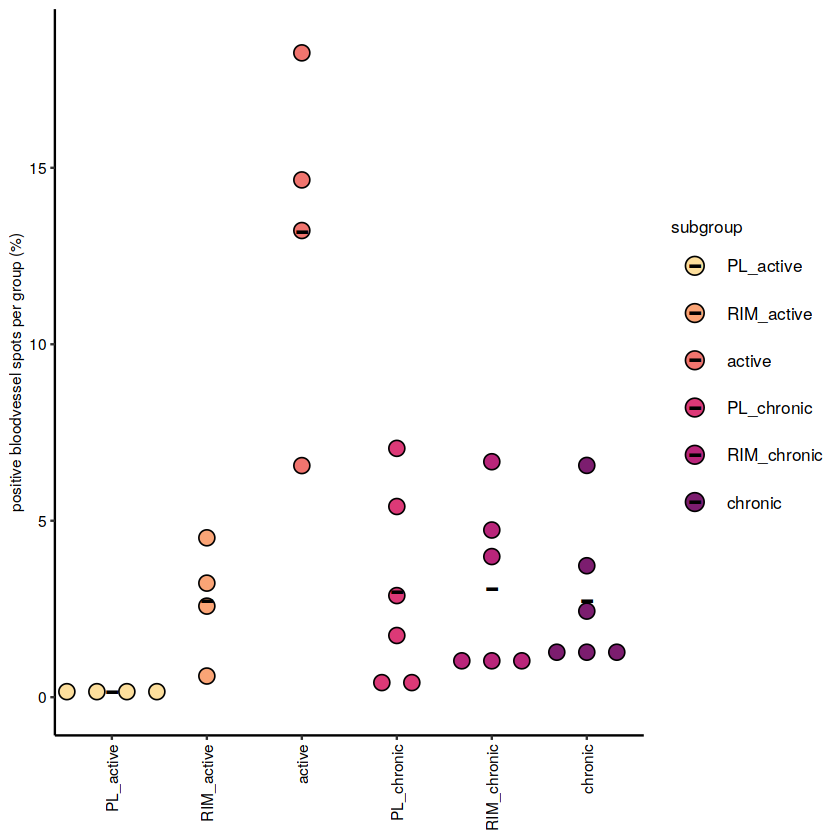

In [2]:
#load BV index
index_mostsamples <- read.csv("index_active-mixed.csv")
index_mostsamples$subgroup <-as.character(index_mostsamples$sub_group)
index_mostsamples$subgroup <- factor(index_mostsamples$subgroup, levels= c("PL_active", "RIM_active", "active", "PL_chronic", "RIM_chronic", "chronic")) #make from character vector a factor

ggplot.theme <- theme(
                    text = element_text(hjust = 0.5, face = "plain", size = (9)),
                    plot.title = element_text(hjust = 0.5, face = "plain", size = (10)),
                    axis.title.x = element_text(face = "plain", size = (9)),
                    axis.title.y = element_text(face = "plain", size = (9)),
                    axis.text = element_text(face = "plain", size = (9), colour = "black"),
                    axis.text.x = element_text(angle = 90, vjust=0.5, hjust=1),
                    plot.subtitle = element_text(hjust = 0.5),
                    panel.background = element_blank(),
                    panel.border = element_blank(),
                    panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
                    panel.grid = element_blank(),
                    axis.line = element_line(color = "black"),
                    plot.background = element_rect(fill="transparent", color=NA),
                    legend.key = element_rect(fill="transparent", color="transparent"),
                    legend.box.background = element_rect(fill="transparent", color="transparent"),
                    legend.background = element_rect(fill="transparent", color="transparent"),
                    legend.text=element_text(size=10),
                    legend.title = element_text(size=10))


# generate plot

my_colors <- c('#fcde9c','#faa476','#f0746e','#dc3977','#b9257a','#7c1d6f') #'#e34f6f',
p <- ggplot(index_mostsamples, aes(x=subgroup, y=BV_index, fill=subgroup)) + 
labs(x=NULL, y="positive bloodvessel spots per group (%)") +

    
geom_dotplot(binaxis='y', stackdir='center', stackratio=2.0, dotsize=0.7) +
            scale_fill_manual(values=my_colors) +
            stat_summary(fun=mean, 
                         geom="point", 
                         shape="-",
                         size=10, 
                         color="black") +
            ggplot.theme

p

  
               
